<a href="https://colab.research.google.com/github/PariseC/plot4gmns/blob/main/plot4gmns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf ./osm_test_data_set/
!git clone https://github.com/asu-trans-ai-lab/osm_test_data_set

%cd osm_test_data_set

Cloning into 'osm_test_data_set'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 162 (delta 50), reused 114 (delta 21), pack-reused 0
Receiving objects: 100% (162/162), 28.28 MiB | 21.42 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/osm_test_data_set


**Step1: install python packages**

In [2]:
!pip install osm2gmns
!pip install grid2demand
!pip install plot4gmns

     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 1.0MB 19.3MB/s 
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


**Step2: convert OSM to GMNS Files**

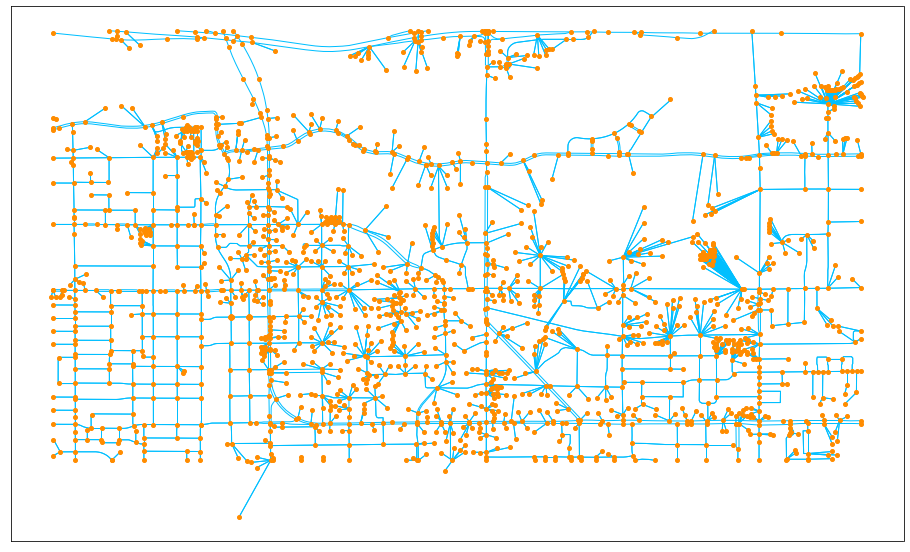

Figure is saved to network.jpg


In [2]:
import osm2gmns as og
net = og.getNetFromOSMFile('./osm_test_data_set/datasets/walk_and_bike/tempe.osm', POIs=True)
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net, output_folder='consolidated')
og.outputNetToCSV(net)
og.show(net)
og.saveFig(net)

**Step3: Run grid2demand to generate demand based POI rates**

In [3]:
import grid2demand as gd
"Step 1: Read Input Network Data"
net = gd.ReadNetworkFiles('')

"Step 2: Partition Grid into cells"
zone = gd.PartitionGrid(number_of_x_blocks=5, number_of_y_blocks=5)
# user can customize number of grid cells or cell's width and height

"Step 3: Get Production/Attraction Rates of Each Land Use Type with a Specific Trip Purpose"
triprate = gd.GetPoiTripRate(trip_rate_folder='',trip_purpose=1)
# user can customize poi_trip_rate.csv and trip purpose

"Step 4: Define Production/Attraction Value of Each Node According to POI Type"
nodedemand = gd.GetNodeDemand()

"Step 5: Calculate Zone-to-zone Accessibility Matrix by Centroid-to-centroid Straight Distance"
accessibility = gd.ProduceAccessMatrix(latitude=30, accessibility_folder='')
# user can customize the latitude of the research area and accessibility.csv

"Step 6: Apply Gravity Model to Conduct Trip Distribution"
demand = gd.RunGravityModel(trip_purpose=1, a=None, b=None, c=None)
# user can customize friction factor coefficients under a specific trip purpose
"Step 7: Generate Agent"
demand = gd.GenerateAgentBasedDemand()

grid2demand, version 0.2.2


2021-04-20 11:30:58,045 - grid2demand_0418a.py[line:941] - WARNING: poi_trip_rate.csv does not exist in the current folder. Default values will be used.
2021-04-20 11:30:58,067 - grid2demand_0418a.py[line:1084] - WARNING: Production value of residential nodes is not defined! Default value is 10.
2021-04-20 11:30:58,068 - grid2demand_0418a.py[line:1087] - WARNING: Attraction value of residential nodes is not defined! Default value is 10.
2021-04-20 11:30:58,074 - grid2demand_0418a.py[line:1090] - WARNING: Production value of boundary nodes is not defined! Default value is 1000.
2021-04-20 11:30:58,078 - grid2demand_0418a.py[line:1093] - WARNING: Attraction value of boundary nodes is not defined! Default value is 1000.



Latitude used for grid partition =  30

Number of zones including virtual zones = 45

Tab of trip purposes used in grid2demand =  1

Total number of poi nodes with unmatched production rate =  330
Total number of poi nodes with unmatched attraction rate =  456

Latitude used for calculating accessibility =  30

Number of OD pairs =  2025

Largest accessibility of distance = 6.27 km
Average accessibility of distance = 2.59 km

Default values of friction factor coefficients under trip purpose 1: 
a= 28507 
b= -0.02 
c= -0.123

Top 10 O-D Volume:
Top 1 O/D pair: zone 42->zone 44, volume = 1309
Top 2 O/D pair: zone 44->zone 42, volume = 1221
Top 3 O/D pair: zone 42->zone 33, volume = 1114
Top 4 O/D pair: zone 33->zone 42, volume = 1079
Top 5 O/D pair: zone 42->zone 41, volume = 999
Top 6 O/D pair: zone 41->zone 42, volume = 975
Top 7 O/D pair: zone 39->zone 42, volume = 880
Top 8 O/D pair: zone 42->zone 31, volume = 866
Top 9 O/D pair: zone 31->zone 33, volume = 848
Top 10 O/D pair: zone 

**Step4: Run plot4gmns to visualize and analyze transportation network**

In [4]:
import plot4gmns as pg

"Step1: read input network data"
net=pg.readNetwork('')

plot4gmns, version 0.0.8


In [6]:
"Step2: check valid attributes"
net.get_valid_node_attr_list() #node attributes
#net.get_valid_link_attr_list() #link attributes
#net.get_valid_poi_attr_list() #poi attributes
#net.get_valid_zone_id_list() #zone attributes
print('')

attr                          type                
ctrl_type                     int                 
activity_type                 str                 
production                    float               
attraction                    float               



In [7]:
"Step3 get valid attributes value"

pg.get_node_attr_value_list(net,'ctrl_type')
#pg.get_link_attr_value_list(net,'link_type_name')
#pg.get_poi_attr_value_list(net,'building')
#pg.get_zone_id_list(net,zone_id=1)

ctrl_type           number              
0                   1765                
1                   80                  


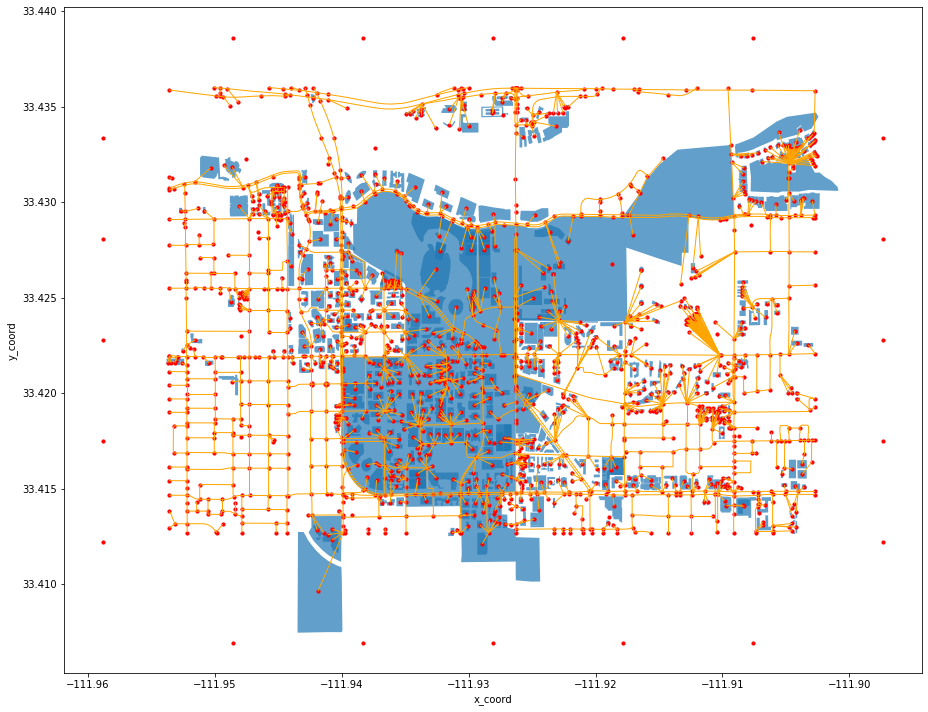

In [8]:
"Step4: show network of different modes"
pg.showNetByAllMode(net)
#pg.showNetByAutoMode(net)
#pg.showNetByBikeMode(net)
#pg.showNetByWalkMode(net)
#pg.showNetByRailMode(net)

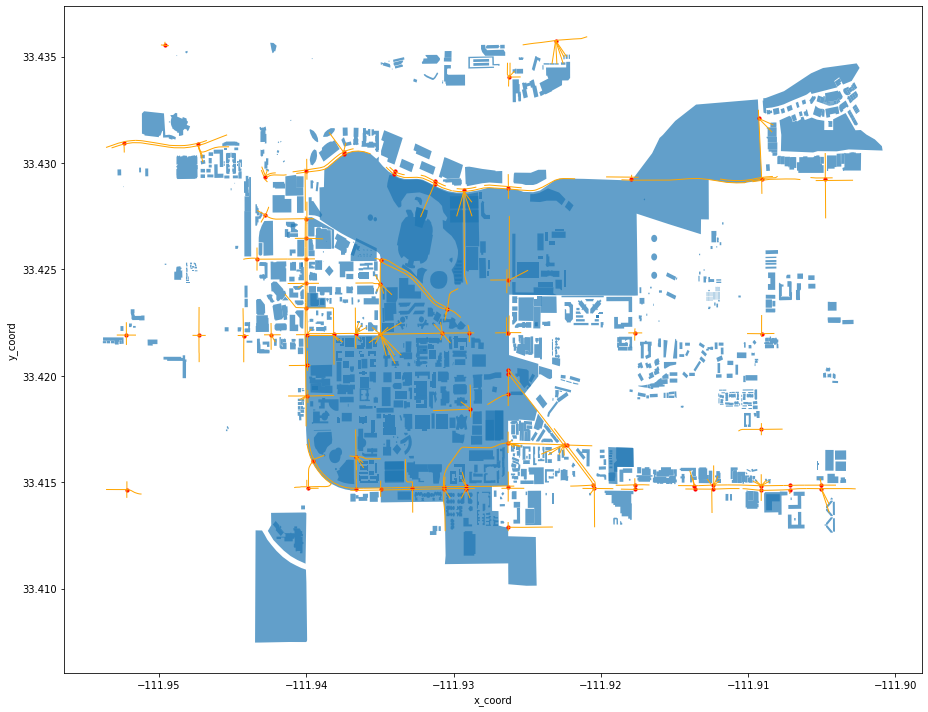

In [9]:
"Step5: show network by node attributes"
pg.showNetByNodeAttr(net,{'ctrl_type':1})
#pg.showNetByNodeAttr(net,{'ctrl_type':(0,1)})
#pg.showNetByNodeAttr(net,{'activity_type':['primary', 'secondary']})
#pg.showNetByNodeAttr(net,{'attraction':(0,1)})
#pg.showNetByNodeAttr(net,{'production':(1,2)})

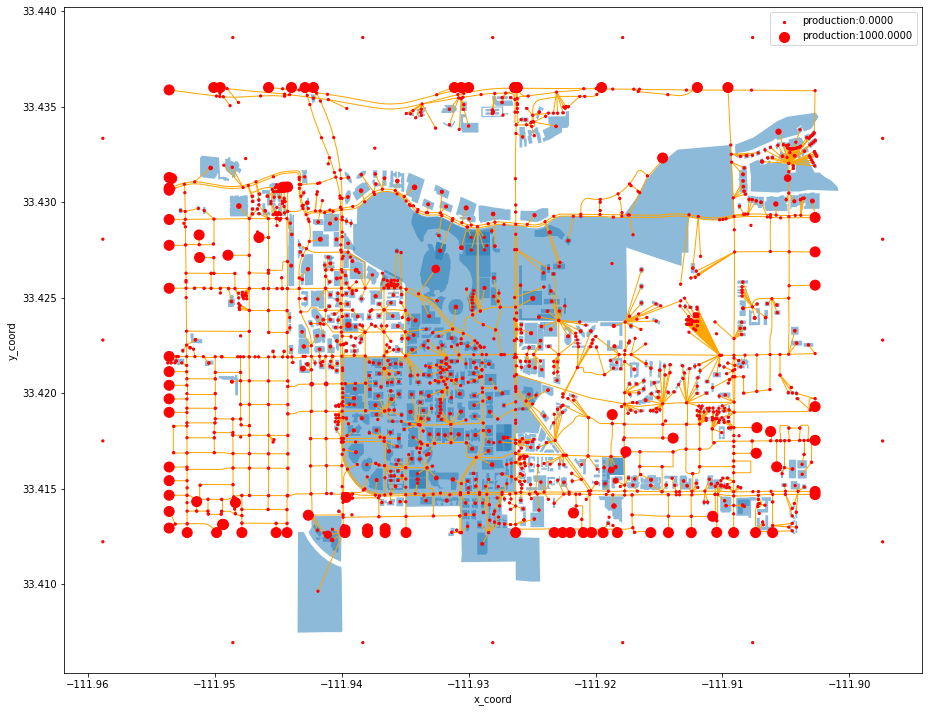

In [10]:
"show network by node production/attraction value with graduated symbology in size"
pg.showNetByNodeProduction(net)
#pg.showNetByNodeAttraction(net)

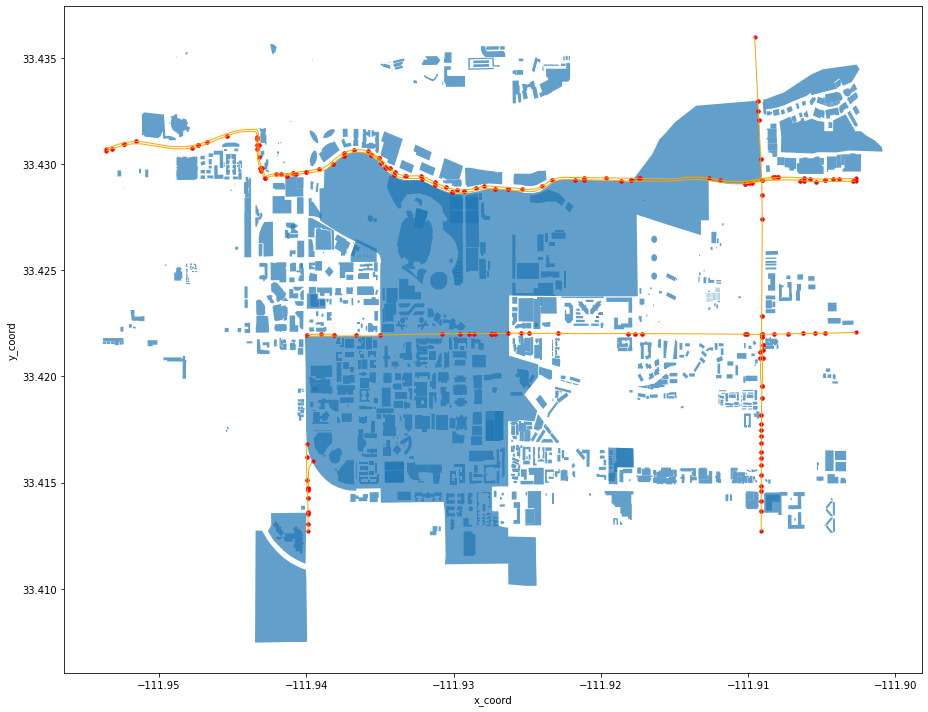

In [13]:
"Step6: show network by link attributes"
pg.showNetByLinkAttr(net,{'link_type_name':'secondary'})
#pg.showNetByLinkAttr(net,{'link_type_name':['secondary','primary']})
#pg.showNetByLinkAttr(net,{'allowed_uses':'auto'})
#pg.showNetByLinkAttr(net,{'free_speed':(20,40)})
#pg.showNetByLinkAttr(net,{'lanes':(1,1)})
#pg.showNetByLinkAttr(net,{'length':(100,300)})

In [ ]:
"show network by link free speed/lanes/capacity with graduated symbology in size"
pg.showNetByLinkFreeSpeed(net)
#pg.showNetByLinkLaneNum(net)
#pg.showNetByLinkCapacity(net)

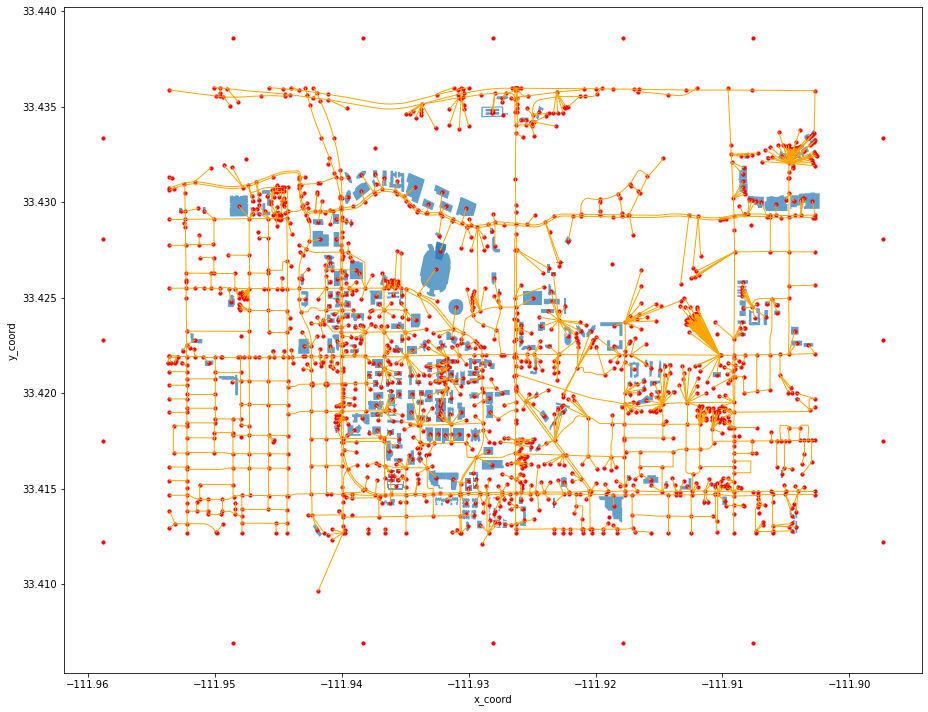

In [16]:
"Step7:  show network by POI attributes"
pg.showNetByPOIAttr(net,{'building':'yes'})
#pg.showNetByPOIAttr(net,{'building':['office', 'yes']})
#pg.showNetByPOIAttr(net,{'activity_zone_id':(1,5)})

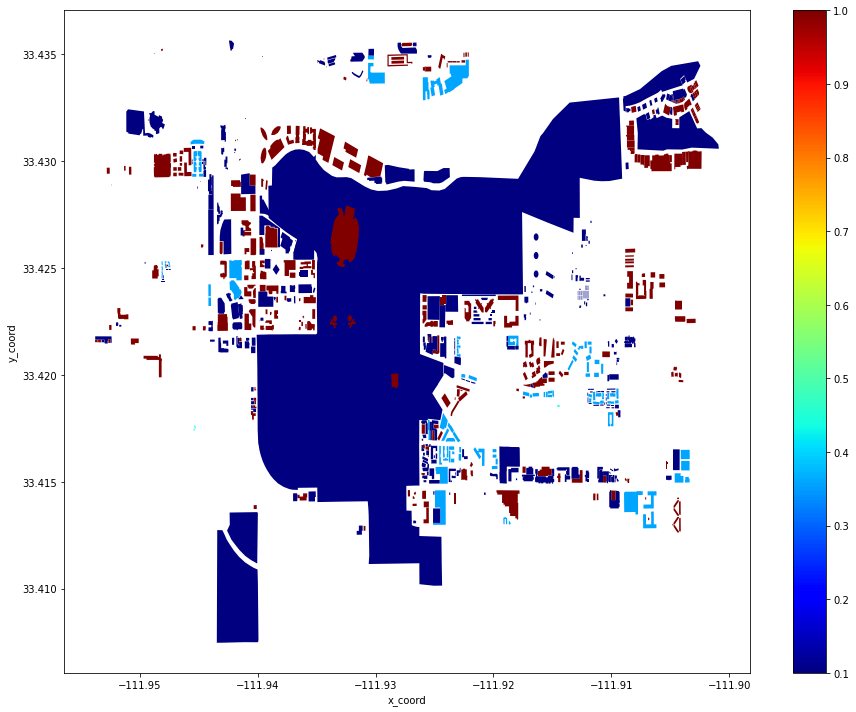

In [18]:
"show network by POI attraction/production heat"
pg.showNetByPOIAttractionHeat(net)
#pg.showNetByPOIProductionHeat(net)

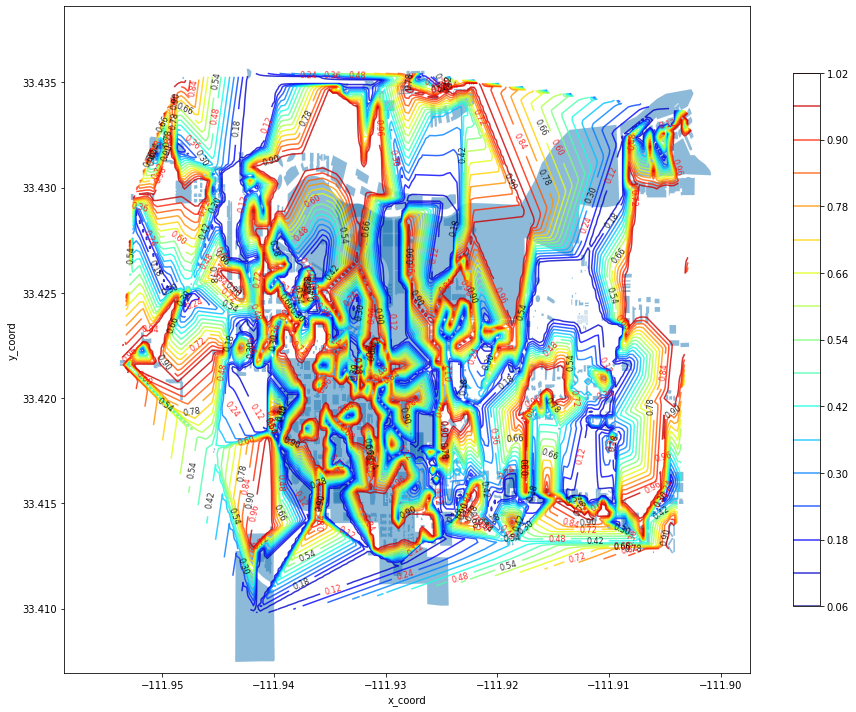

In [20]:
"show network by POI attraction/production contour"
pg.showNetByPOIAttractionContour(net)
#pg.showNetByPOIProductionContour(net)

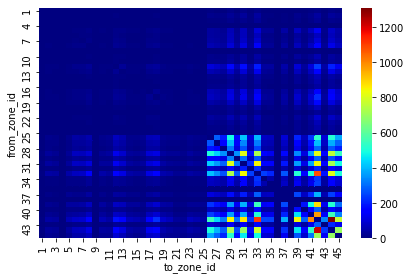

In [21]:
"Step8: show network by zone attributes"

"show network by zone demand heat"
pg.showNetByZoneDemandHeat(net,annot=False) # annot:bool,whether or not show zone-to-zone demand value

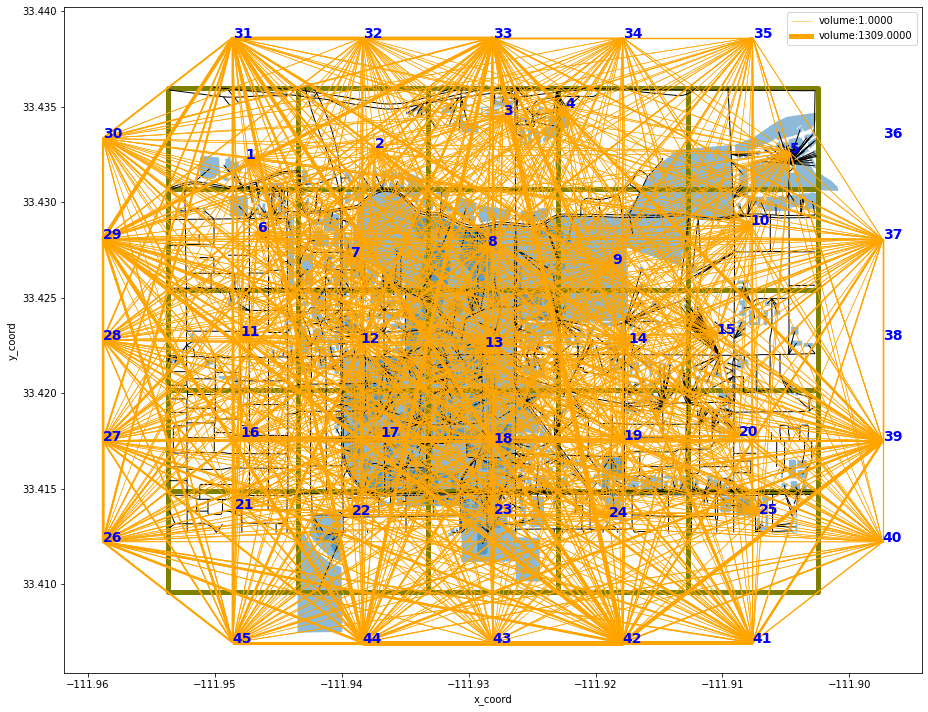

In [22]:
"show network by zone demand flow"
pg.showNetByZoneDemandFlow(net,annot=True,bg=False) #annot：bool, whether or not show zone id;bg：bool, whether or not show network (node, link, and poi)

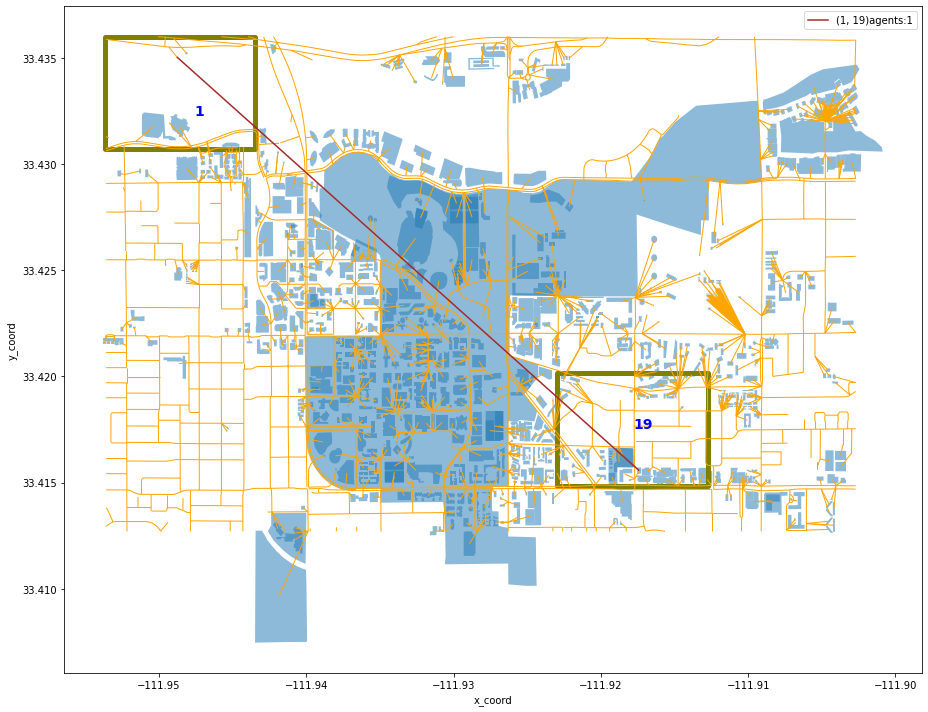

In [26]:
"show network by node-to-node agents for one or more zone-to-zone O/D pairs"
pg.showNetByZoneAgent(net,(1,19))
#pg.showNetByZoneAgent(net,[(1,15),(6,5)])